# ** Código grupo 02 **

El primer paso es crear el mapa de las paradas de metro.


Importamos librerias

In [47]:
# VARIABLES Y DATOS
import networkx as nx
import matplotlib.pyplot as plt
import math
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime, timedelta
import webbrowser
import folium
import tkinter as tk
from tkinter import ttk, messagebox

Escribimos las coordenadas de cada parada y los transbordos

In [48]:
# Coordenadas de las estaciones
LISTA_COORDENADAS = {
    "LINEA_A": {
        "Alberti": [-34.60979154021843, -58.40086740463643],
        "Pasco": [-34.609455989895245, -58.39833539938651],
        "Congreso": [-34.608996813572965, -58.39268130286541],
        "Sáenz Peña": [-34.609350026351635, -58.38669461230903],
        "Lima": [-34.60904096524644, -58.382553281561165],
        "Piedras": [-34.60886435838594, -58.37861579874318],
        "Perú": [-34.60857295624564, -58.37492507907565],
        "Plaza de Mayo": [-34.60875839408815, -58.37151330936176],
    },
    "LINEA_B": {
        "Pasteur": [-34.60409382222638, -58.39968610352264],
        "Callao_B": [-34.60434108592872, -58.39243341083207],
        "Uruguay": [-34.60400961150244, -58.38674150304544],
        "Carlos Pellegrini": [-34.60370936151744, -58.381380708823514],
        "Florida": [-34.603244782294965, -58.37454489610343],
        "Leandro N. Alem": [-34.60302925135683, -58.37004749037363],
    },
    "LINEA_C": {
        "Constitución": [-34.62753942668646, -58.38156121435256],
        "San Juan": [-34.622153370728164, -58.37994066311232],
        "Independencia_C": [-34.6180519466846, -58.380256098860485],
        "Moreno": [-34.61237244698663, -58.38060876062811],
        "Avenida de Mayo": [-34.60899098423044, -58.38066790483753],
        "Diagonal Norte": [-34.60482400192541, -58.379488963667214],
        "Lavalle": [-34.60207510706261, -58.37814441867528],
        "General San Martin": [-34.59553840845914, -58.37745834587982],
        "Retiro": [-34.59238671801715, -58.37594819705223],
    },
    "LINEA_D": {
        "Facultad de Medicina": [-34.5993682836706, -58.3977359491304],
        "Callao_D": [-34.59957140474557, -58.392307158181815],
        "Tribunales": [-34.60176154833913, -58.38456093858365],
        "9 de Julio": [-34.60453888530524, -58.38014065809253],
        "Catedral": [-34.60757221396939, -58.37419688300631],
    },
    "LINEA_E": {
        "Pichincha": [-34.62304099718662, -58.39710097116426],
        "Entre Ríos": [-34.62270550042393, -58.391489789929345],
        "San José": [-34.62224639739259, -58.385224149714155],
        "Independencia_E": [-34.61812318513492, -58.380224512115895],
        "Belgrano": [-34.6128518852584, -58.37787489702144],
        "Bolívar": [-34.60961123829135, -58.37401251606132],
    },
}


In [49]:
# Lista de transbordos con las conexiones manuales
transbordos = [
    ("Lima", "Avenida de Mayo"),                # Línea A <-> Línea C
    ("Perú", "Catedral"),                       # Línea A <-> Línea D
    ("Independencia_C", "Independencia_E"),     # Línea C <-> Línea E
    ("Bolívar", "Perú"),                        # Línea E <-> Línea A
    ("Bolívar", "Catedral"),                    # Línea E <-> Línea D
    ("Diagonal Norte", "Carlos Pellegrini"),    # Línea C <-> Línea B
    ("Carlos Pellegrini", "9 de Julio"),        # Línea B <-> Línea D
    ("9 de Julio", "Diagonal Norte"),           # Línea D <-> Línea C
]

Usamos la fórmula de Haversine para calcular las distancias

In [50]:
def haversine(lat1, lon1, lat2, lon2) -> float:
    """
    Esta función calcula según la fórmula de Haversine la distancia entre
    dos puntos geográficos a partir de sus coordenadas y teniendo en cuenta
    la curvatura de la Tierra.
    """
    R = 6371e3  # Radio de la Tierra en metros
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi = radians(lat2 - lat1)
    dlambda = radians(lon2 - lon1)
    a = sin(dphi / 2) ** 2 + cos(phi1) * cos(phi2) * sin(dlambda / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c


def distancia(coordenadas_1, coordenadas_2) -> float:
    """
    Usa la función haversine para calcular la respectiva distancia entre dos coordenadas.
    """
    return haversine(coordenadas_1[0], coordenadas_1[1], coordenadas_2[0], coordenadas_2[1])

Coloremos los nodos y conexiones

In [51]:
# Función para colorear los nodos según la línea a la que pertenecen
# Agregamos los nodos y las aristas a G
LINEA_A = {"Alberti", "Pasco", "Congreso", "Sáenz Peña", "Lima", "Piedras", "Perú", "Plaza de Mayo"}
LINEA_B = {"Pasteur", "Callao_B", "Uruguay", "Carlos Pellegrini", "Florida", "Leandro N. Alem"}
LINEA_C = {"Constitución", "San Juan", "Independencia_C", "Moreno","Avenida de Mayo", "Diagonal Norte", "Lavalle", "General San Martin", "Retiro"}
LINEA_D = {"Facultad de Medicina", "Callao_D", "Tribunales", "9 de Julio", "Diagonal Norte", "Catedral"}
LINEA_E = {"Pichincha", "Entre Ríos", "San José", "Independencia_E", "Belgrano", "Bolívar"}

# lista de estaciones
estaciones_linea = [LINEA_A, LINEA_B, LINEA_C, LINEA_D, LINEA_E]

def colorear_nodos(G, estaciones):
    color = []

    for node in G.nodes:
        if node in estaciones[0]:
            color.append('lightblue')
        elif node in estaciones[1]:
            color.append('red')
        elif node in estaciones[2]:
            color.append('darkblue')
        elif node in estaciones[3]:
            color.append('green')
        elif node in estaciones[4]:
            color.append('purple')
        else:
            color.append('gray')  # Color por defecto si no se encuentra en ninguna línea
    return color

def colorear_edges(G, estaciones, transbordos_list):
    color_edge = []
    for edge in G.edges:
        node1, node2 = edge
        if (node1, node2) in transbordos or (node2, node1) in transbordos:
            color_edge.append('yellow')
        elif node1 in estaciones[0] or node2 in estaciones[0]:
            color_edge.append('lightblue')
        elif node1 in estaciones[1] or node2 in estaciones[1]:
            color_edge.append('red')
        elif node1 in estaciones[2] or node2 in estaciones[2]:
            color_edge.append('darkblue')
        elif node1 in estaciones[3] or node2 in estaciones[3]:
            color_edge.append('green')
        elif node1 in estaciones[4] or node2 in estaciones[4] :
            color_edge.append('purple')
        else:
            color_edge.append('gray')  # Color por defecto
    return color_edge

In [52]:
# Grafo vacío
G = nx.Graph()

# Agregamos nodos con posiciones
for linea, estaciones in LISTA_COORDENADAS.items():
    for estacion, coordenadas in estaciones.items():
        G.add_node(estacion, pos=(coordenadas[0], coordenadas[1]))

# Definimos las distancias entre las estaciones
for linea, estaciones in LISTA_COORDENADAS.items():
    estaciones_lista = list(estaciones.keys())
    for i in range(len(estaciones_lista) - 1):
        estacion1 = estaciones_lista[i]
        estacion2 = estaciones_lista[i + 1]
        coord1 = estaciones[estacion1]
        coord2 = estaciones[estacion2]
        G.add_edge(estacion1, estacion2, weight=distancia(coord1, coord2), line=linea)

# Obtener posiciones de los nodos
pos = nx.get_node_attributes(G, 'pos')

# Agregar las aristas entre las estaciones de transbordo
for conexion in transbordos:
    estacion1, estacion2 = conexion
    if estacion1 in G.nodes and estacion2 in G.nodes:
        G.add_edge(estacion1, estacion2, weight=10, line="transbordo")  # Peso de penalizacion 10 metros




Dibujamos el grafo

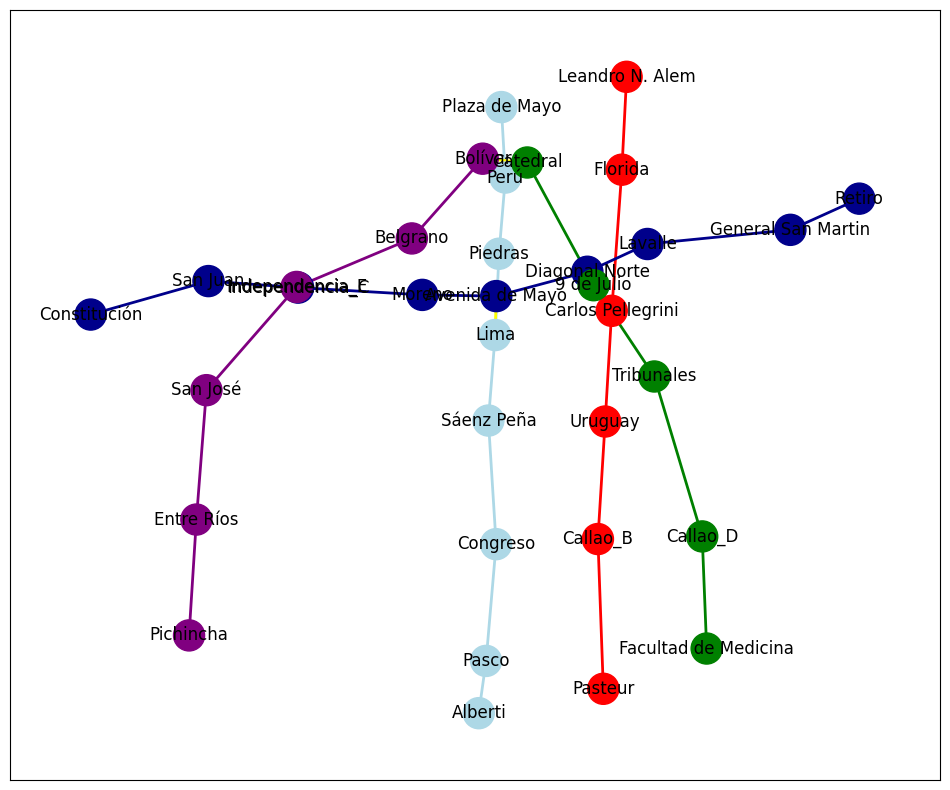

In [53]:
# Dibujar el grafo para ver si lo estamos contruyendo bien
# Coloreamos los nodos y las aristas
node_colors = colorear_nodos(G, estaciones_linea)
edge_colors = colorear_edges(G, estaciones_linea, transbordos)

# Dibujar el grafo
plt.figure(figsize=(12, 10))

# Dibujamos las aristas
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

# Dibujamos los nodos
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

# Dibujamos las etiquetas
nx.draw_networkx_labels(G, pos, font_size=12)

plt.show()

Algoritmo A*

In [54]:
# Diccionario con velocidades
velocidades = {
    "LINEA_A": 5.860,
    "LINEA_B": 7.414,
    "LINEA_C": 5.120,
    "LINEA_D": 6.425,
    "LINEA_E": 6.464,
}

In [55]:
def haversine_h(nodo_actual, nodo_objetivo) -> float:
    """
    Calculo de la distancia entre dos nodos del grafo elegidos (el nodo actual y el nodo destino) con la
    fórmula de haversine.
    """
    pos_actual = G.nodes[nodo_actual]['pos']
    pos_objetivo = G.nodes[nodo_objetivo]['pos']
    lat1 = pos_actual[0]
    lon1 = pos_actual[1]
    lat2 = pos_objetivo[0]
    lon2 = pos_objetivo[1]
    # Convertir de grados a radianes
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Calcular las diferencias
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Aplicar la fórmula de Haversine
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Radio de la Tierra en kilómetros
    R = 6371.0

    # Calcular la distancia
    distancia = R * c * 1000

    return distancia


In [56]:
def tiempo(path, grafo, velocidades) -> float:
    """
    Coge el camino desde el origen al destino y calcula cuanto tarda teniendo en cuenta las velocidades
    de cada linea, y el tiempo por transbordo
    """
    if len(path) == 1:
        return 0

    path_g = grafo.subgraph(path)
    tiempo = 0
    for i in range(len(path) - 1):
        nodo1 = path[i]
        nodo2 = path[i + 1]

        arista = path_g.get_edge_data(nodo1, nodo2)
        linea = arista.get("line")
        if linea == "transbordo":
            tiempo += 2 # consideramos que se tarda una media de 2 min en realizar un transbordo
        else:
            distancia = arista.get("weight", 0)
            velocidad = velocidades.get(linea, 0)
            tiempo_trayecto = distancia / velocidad
            tiempo += tiempo_trayecto / 60 # lo convertimos en minutos

    return tiempo




In [57]:
def a_estrella(origen, destino, grafo, velocidades):
    """
    Aplica el algoritmo A* para hallar el camino más corto entre el origen y el destino, devolviendo
    además la longitud de dicho camino.
    """
    camino = nx.astar_path(grafo, origen, destino, heuristic=haversine_h)
    longitud = nx.astar_path_length(grafo, origen, destino, heuristic=haversine_h)
    tiempo_trayecto = tiempo(camino, grafo, velocidades)
    print(camino)
    print(f"El camino es de {longitud:.4f} m")
    print(f"El trayecto tarda {tiempo_trayecto:.2f} min")
    return camino, longitud

Visualización de algoritmo (ejemplo)

In [58]:
# visualizacion del resultado de A*
def visualizacion(origen, destino, grafo, velocidades):
    path = a_estrella(origen, destino, grafo, velocidades)[0]
    path_g = grafo.subgraph(path)
    pos_path = nx.get_node_attributes(grafo, 'pos')
    color_path = colorear_nodos(path_g, estaciones_linea)
    color_edge_path = colorear_edges(path_g, estaciones_linea, transbordos)

    nx.draw(path_g,
            pos=pos_path,
            node_color=color_path,
            with_labels=True,
            edge_color=color_edge_path,
            font_size=5,
            node_size=100)
    plt.show()


Prueba

['Pasteur', 'Callao_B', 'Uruguay', 'Carlos Pellegrini', '9 de Julio', 'Catedral', 'Perú', 'Plaza de Mayo']
El camino es de 2651.3790 m
El trayecto tarda 10.32 min


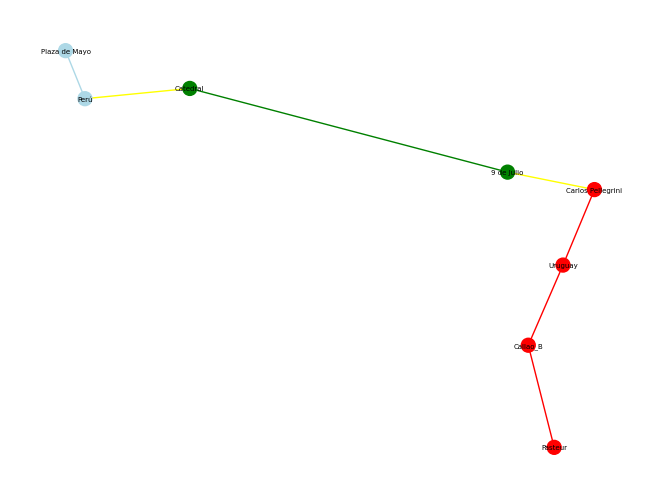

['Pasteur']
El camino es de 0.0000 m
El trayecto tarda 0.00 min


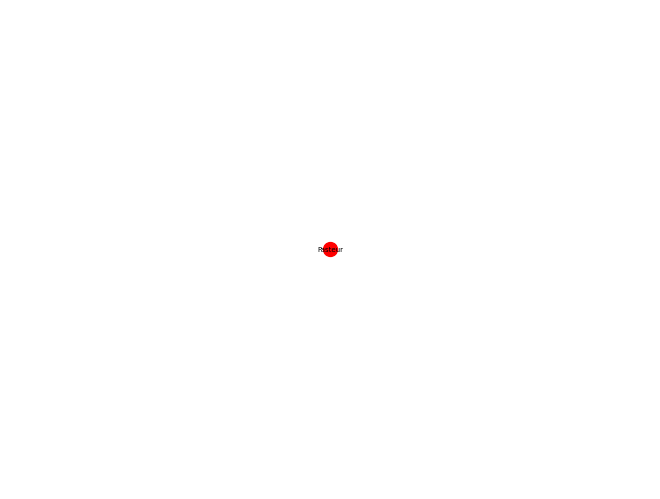

['Constitución', 'San Juan', 'Independencia_C', 'Moreno', 'Avenida de Mayo', 'Diagonal Norte', 'Lavalle', 'General San Martin', 'Retiro']
El camino es de 3993.8854 m
El trayecto tarda 13.00 min


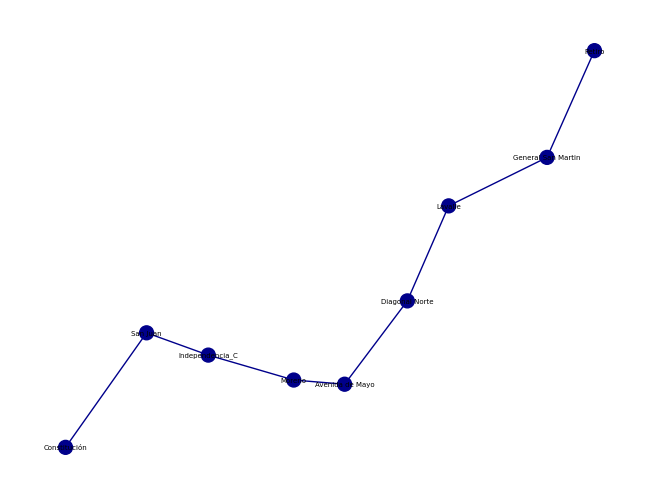

In [59]:
# PRUEBA
origen = "Pasteur"
destino = "Plaza de Mayo"

# Run visualization
visualizacion(origen, destino, G, velocidades)

origen = "Pasteur"
destino = "Pasteur"

# Run visualization
visualizacion(origen, destino, G, velocidades)

origen = "Constitución"
destino = "Retiro"

# Run visualization
visualizacion(origen, destino, G, velocidades)